# **Mount**

Mount the google drive directory

In [ ]:
#MIRCV 2021
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install opencv-python==4.4.0.46
!pip install import-ipynb

# **Unzip**
Unzip the database if is not yet has been done

In [ ]:
'''
# Unzipping dataset
%cd '/content/gdrive/MyDrive/mircv2021/progetto/dbs/' 
!unzip -q facial_expression.zip
'''

# **Model and Initialization**

Import the preconstructed model(facenet_keras) as well as initialize variables

In [ ]:
import glob
import os
import numpy as np
import PIL

import tensorflow as tf
from tensorflow.keras import layers as L
from tensorflow.keras.models import Model, Sequential
from tensorflow.python.keras.preprocessing import dataset_utils
from IPython.display import display
from tqdm.notebook import tqdm

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC

from keras.models import load_model

model = load_model('/content/gdrive/MyDrive/mircv2021/progetto/modello/keras-facenet/model/facenet_keras.h5')
model.load_weights('/content/gdrive/MyDrive/mircv2021/progetto/modello/keras-facenet/weights/facenet_keras_weights.h5')

np.random.seed(42)
tf.random.set_seed(42)

BASE_DIR = '/content/gdrive/MyDrive/mircv2021/progetto/dbs/dataset'
TRAIN_DATA_DIR = os.path.join(BASE_DIR, 'PublicTest')
TEST_DATA_DIR = os.path.join(BASE_DIR, 'Training')

BATCH_SIZE = 256

# **Dataset**
For the dataset we collect all the files using the available function of keras image_dataset_from_directory(); by using shuffle=False we mantain the alphanumerical order. We obtain 3589 files divided by 7 classes(suprise,neutral,sad,happy,fear,angry,disgust).
# **Retriving image paths,labels,classes and image ids**
Using the utility function index_directory() we obtain the image_paths,labels(the numerical label corrisponding to each classes) of each .jpg in the dataset and class_names. In addition, we collect all the ids by taking the terminal part of each path

In [ ]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    TRAIN_DATA_DIR,
    seed=123,
    shuffle=False,
    image_size=(160, 160),
    batch_size=BATCH_SIZE,
    color_mode='rgb')

image_paths, labels, class_names = dataset_utils.index_directory(TRAIN_DATA_DIR, labels='inferred', formats='.jpg', shuffle=False)
image_ids = [path.split('/')[10] for path in image_paths]

Found 3589 files belonging to 7 classes.
Found 3589 files belonging to 7 classes.


# **Visualize Images**

We will visualize a batch of the dataset as a test

(256, 160, 160, 3) (256,)
float32 0.0 255.0


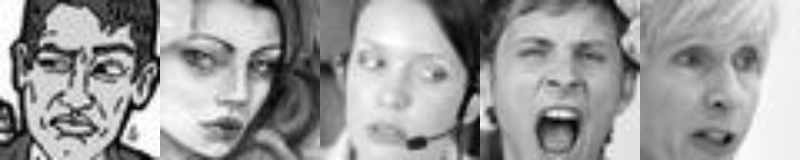

In [24]:
import PIL

def visualize_batch(dataset):
  batch = next(iter(dataset))  
  images, labels = batch
  print(images.shape, labels.shape)

  # inspect data type
  images = images.numpy()
  print(images.dtype, images.min(), images.max())  # float32, [0, 255]

  # show some images
  sample_images = np.hstack(images[:5])  # stack 5 images horizontally
  sample_images = sample_images.astype(np.uint8)  # PIL wants uint8
  sample_images = PIL.Image.fromarray(sample_images)  # to PIL image
  display(sample_images)  # show it

visualize_batch(dataset)

# **Extracting features**
We will use the preconstructed model, by calling its predict() function,to extract the features from the dataset

In [ ]:
features = model.predict(dataset,batch_size=BATCH_SIZE, verbose=1)

15/15 [==============================] - 693s 48s/step


# **Saving as numpy**
We save the ids and features of the images into two pickles

In [ ]:
np.save('/content/gdrive/MyDrive/mircv2021/progetto/pickles/image_ids.npy', image_ids)
np.save('/content/gdrive/MyDrive/mircv2021/progetto/pickles/image_features.npy', features)